In [8]:
import os
import cv2
import h5py

import numpy as np
import matplotlib.pyplot as plt

import keras
import keras.utils as np_utils
from keras import Model, Input
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax, Dropout

x_train = []
y_train = []

x_test = []
y_test = []

h5_path = os.path.join("h5_datas/hand_aug")
h5_files_list = sorted(os.listdir(h5_path))

for h5_file in h5_files_list:
    dest_file_path = os.path.join(h5_path, h5_file)
    print(dest_file_path)

    with h5py.File(dest_file_path, "r") as f:
        x = f["X"][:]
        y = f["Y"][:]
        
        for i in range(len(x)):
            x_train.append(x[i])
            y_train.append(y[i])
         
        
h5_path = os.path.join("h5_datas/hand")
h5_files_list = sorted(os.listdir(h5_path))

for h5_file in h5_files_list:
    dest_file_path = os.path.join(h5_path, h5_file)
    print(dest_file_path)

    with h5py.File(dest_file_path, "r") as f:
        x = f["X"][:]
        y = f["Y"][:]
        
        for i in range(len(x)):
            x_test.append(x[i])
            y_test.append(y[i])
            
            
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

# Shuffle Data
(s1, s2) = (np.arange(x_train.shape[0]), np.arange(x_test.shape[0]))

np.random.shuffle(s1)
np.random.shuffle(s2)

x_train = x_train[s1]
y_train = y_train[s1]

x_test = x_test[s2]
y_test = y_test[s2]

# Normalization : Gray Scale
# 0~255 -> 0~1
x_train = x_train/255.0
x_test = x_test/255.0


# # Standardization : Color Image
# # z-score
# zscore_mean = np.mean(X)
# X -= zscore_mean
# zscore_std = np.std(X)
# X /= zscore_std


# 마지막 테스트용 10개 빼놓기
x_last_test = x_test[:10]
y_last_test = y_test[:10]
x_test = x_test[10:]
y_test = y_test[10:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_last_test.shape, y_last_test.shape)

h5_datas/hand_aug/hand_aug_dataset_gray_150px_not_preprocessing_01.h5
h5_datas/hand_aug/hand_aug_dataset_gray_150px_not_preprocessing_02.h5
h5_datas/hand_aug/hand_aug_dataset_gray_150px_not_preprocessing_03.h5
h5_datas/hand_aug/hand_aug_dataset_gray_150px_not_preprocessing_04.h5
h5_datas/hand_aug/hand_aug_dataset_gray_150px_not_preprocessing_05.h5
h5_datas/hand_aug/hand_aug_dataset_gray_150px_not_preprocessing_06.h5
h5_datas/hand_aug/hand_aug_dataset_gray_150px_not_preprocessing_07.h5
h5_datas/hand_aug/hand_aug_dataset_gray_150px_not_preprocessing_08.h5
h5_datas/hand_aug/hand_aug_dataset_gray_150px_not_preprocessing_09.h5
h5_datas/hand_aug/hand_aug_dataset_gray_150px_not_preprocessing_10.h5
h5_datas/hand_aug/hand_aug_dataset_gray_150px_not_preprocessing_11.h5
h5_datas/hand_aug/hand_aug_dataset_gray_150px_not_preprocessing_12.h5
h5_datas/hand_aug/hand_aug_dataset_gray_150px_not_preprocessing_13.h5
h5_datas/hand_aug/hand_aug_dataset_gray_150px_not_preprocessing_14.h5
h5_datas/hand_aug/ha

In [9]:
inputs = Input((150, 150, 1,))

conv_1 = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(inputs)
conv_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv_1)

conv_2 = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(conv_1)
conv_2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv_2)

conv_3 = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(conv_2)
conv_3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv_3)

fc = Flatten()(conv_3)
fc = Dense(64, activation="relu")(fc)
fc = Dropout(0.5)(fc)

outputs = Dense(7)(fc)
outputs = Softmax()(outputs)

model = Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 64)        0   

In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

save_dir = "model"
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

model_name = "gray_150px_conv_32_32_64_dense_64_dropout_0.5_rmsprop"
model_path = os.path.join(save_dir, model_name)

checkpoint = keras.callbacks.ModelCheckpoint(model_path,
                                             monitor='val_accuracy',
                                             save_best_only=True,
                                             verbose=1)

earlystop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                          patience=50,
                                          verbose =1)

hist = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=200,
    batch_size=24,
    callbacks=[checkpoint, earlystop]
)

Train on 28559 samples, validate on 1743 samples
Epoch 1/200
28559/28559 [==============================] - 27s 949us/step - loss: 1.8536 - accuracy: 0.2309 - val_loss: 1.2498 - val_accuracy: 0.5749

Epoch 00001: val_accuracy improved from -inf to 0.57487, saving model to model/gray_150px_conv_32_32_64_dense_64_dropout_0.5_rmsprop
Epoch 2/200
28559/28559 [==============================] - 25s 873us/step - loss: 1.3986 - accuracy: 0.4537 - val_loss: 0.8632 - val_accuracy: 0.7470

Epoch 00002: val_accuracy improved from 0.57487 to 0.74699, saving model to model/gray_150px_conv_32_32_64_dense_64_dropout_0.5_rmsprop
Epoch 3/200
28559/28559 [==============================] - 25s 874us/step - loss: 1.1694 - accuracy: 0.5491 - val_loss: 0.7819 - val_accuracy: 0.7780

Epoch 00003: val_accuracy improved from 0.74699 to 0.77797, saving model to model/gray_150px_conv_32_32_64_dense_64_dropout_0.5_rmsprop
Epoch 4/200
28559/28559 [==============================] - 26s 898us/step - loss: 1.0661 - ac

KeyboardInterrupt: 

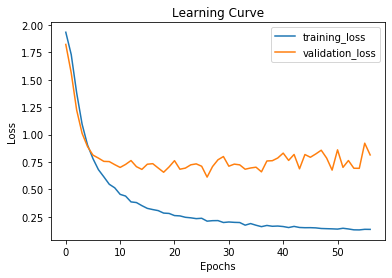

In [4]:
# Loss Curve
training_loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(training_loss, label='training_loss')
plt.plot(val_loss, label='validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

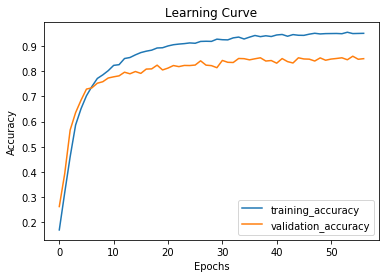

In [5]:
# Accuracy Curve
training_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.plot(training_acc, label="training_accuracy")
plt.plot(val_acc, label="validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

Predict : 2
Answer  : 0



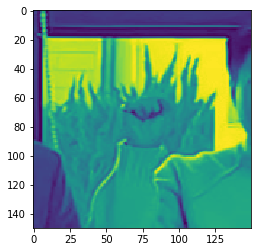


Predict : 3
Answer  : 3



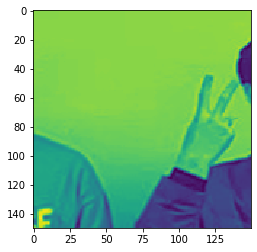


Predict : 3
Answer  : 3



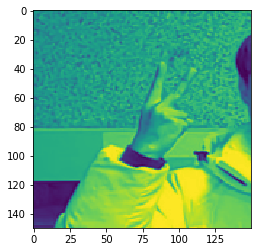


Predict : 6
Answer  : 6



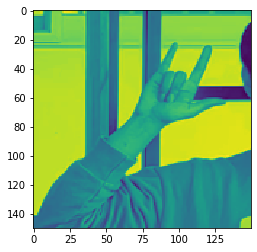


Predict : 6
Answer  : 6



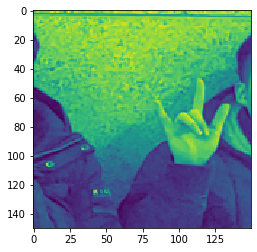


Predict : 2
Answer  : 2



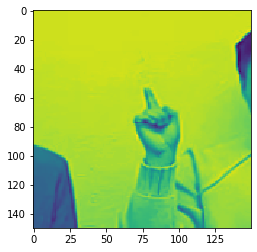


Predict : 4
Answer  : 4



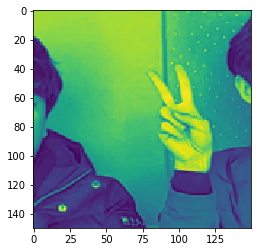


Predict : 5
Answer  : 5



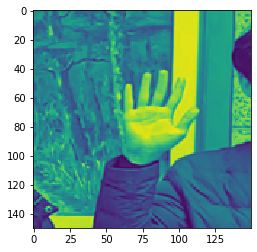


Predict : 2
Answer  : 6



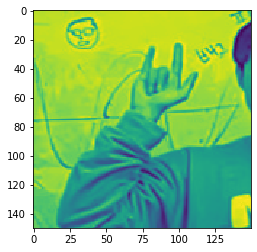


Predict : 2
Answer  : 2



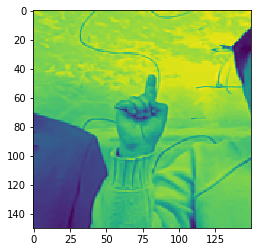

In [7]:
predictions = model.predict(x_last_test, batch_size=10)
predictions = np.argmax(predictions, axis=1)
answers = np.argmax(y_last_test, axis=1)

x_last_test *= 255.0

for i in range(10):
    print("Predict : %d\nAnswer  : %d\n" % (predictions[i], answers[i]))
    
    plt.imshow(x_last_test[i][:, :, 0])
    plt.show()
    print("")